# Packages

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
class Create_simulation():
    
    def __init__(self, env, max_steps = 100):
        self.env = env
        self.count_list = []     
        self.max_steps = max_steps
        
        
    def __get_act__(self, observation):        
        if observation[2] < 0:
            action = 0
        elif observation[2] > 0:
            action = 1
        return(action)
    
    
    def play_one_episode(self, rend):        
        observation = self.env.reset()
        done = False
        cnt = 0
        while not done and cnt < self.max_steps:
            cnt += 1
            act = self.__get_act__(observation)
            observation, reward, done, info = self.env.step(act)
            if rend:
                self.env.render()                
        if rend:
            self.env.close()        
        return(cnt) 
    
        
    def play_many_episode(self, iters, rend):
        self.count_list = []
        for _ in range(iters):            
            count = self.play_one_episode(rend)
            self.count_list.append(count)
        return(self.count_list)

In [3]:
env = gym.make('CartPole-v0')

In [4]:
cart1 = Create_simulation(env, max_steps = 100)

In [5]:
cart1.play_one_episode(rend = True)

52

In [6]:
cart1.play_many_episode(iters = 5, rend = False)

[32, 35, 39, 50, 52]

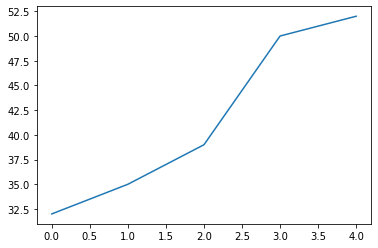

In [7]:
plt.plot(cart1.count_list)